In [1]:
import re
import requests
import json

url = 'https://push2his.eastmoney.com/api/qt/stock/kline/get?cb=jQuery351016702133557143928_1757311398446&secid=1.000300&ut=fa5fd1943c7b386f172d6893dbfba10b&fields1=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf6&fields2=f51%2Cf52%2Cf53%2Cf54%2Cf55%2Cf56%2Cf57%2Cf58%2Cf59%2Cf60%2Cf61&klt=101&fqt=1&beg=0&end=20500101&smplmt=460&lmt=1000000&_=1757311398447'

repsonse = requests.get(url)
text = repsonse.text
# print(repsonse.text)
# print(repsonse.status_code)

"""
jQuery35109392514059566558_1756826314307({"rc":0,"rt":17,"svr":181669694,"lt":1,"full":0,"dlmkts":"","data":{"code":"000300","market":1,"name":"沪深300","decimal":2,"dktotal":5021,"preKPrice":3941.42,"klines":["2025-03-12,3946.86,3927.23,3953.61,3921.47,156732190,309627267364.80,0.82,-0.36,-14.19,0.48","2025-03-13,3925.74,3911.58,3939.29,3897.38,
"""

match = re.search(r'\((\{.*\})\)', text)

json_str = match.group(1) # 获取括号中的内容
data = json.loads(json_str)

gupiao_name = data['data']['name']
gupiao_size = len(data['data']['klines'])

print(gupiao_name, gupiao_size)

# for line in data['data']['klines']:
#     print(line.split(','))

data_list = [line.split(',') for line in data['data']['klines']]






沪深300 460


In [2]:
import pandas as pd

df = pd.DataFrame(data_list)
df.columns = ["date", "open", "close", "high", "low", 
           "volume", "amount", "amplitude", "change_pct", 
           "change_val", "turnover"]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.to_csv(f'{gupiao_name}-{gupiao_size}.csv', index=False)

print(df)




               open    close     high      low     volume           amount  \
date                                                                         
2005-01-04   994.77   982.79   994.77   980.66    7412868    4431977400.00   
2005-01-19   974.33   967.21   974.33   965.26    6338091    3427951300.00   
2005-02-03  1005.56   993.22  1014.19   992.16   16974539   10057310300.00   
2005-03-01  1039.35  1035.93  1042.74  1031.17    9962090    6288790700.00   
2005-03-16  1011.85  1003.07  1012.20   995.97   10622782    7153745900.00   
...             ...      ...      ...      ...        ...              ...   
2025-07-11  4011.47  4014.81  4065.94  4010.11  262052773  443780794880.40   
2025-07-28  4128.20  4135.82  4146.12  4112.97  222759815  406792873973.30   
2025-08-12  4123.58  4143.83  4153.29  4121.22  177287823  383088423330.00   
2025-08-27  4458.84  4386.13  4494.91  4386.13  333133898  785098482973.50   
2025-09-09  4448.74  4436.26  4472.09  4412.69  221375460  56286

In [4]:
import pandas as pd

df = pd.DataFrame(data_list)
df.columns = ["date", "open", "close", "high", "low", 
           "volume", "amount", "amplitude", "change_pct", 
           "change_val", "turnover"]
df['date'] = pd.to_datetime(df['date']) # 将日期列转换为时间格式
# df.set_index('date', inplace=True) # 将日期列设置为索引
df.to_csv(f'{gupiao_name}-{gupiao_size}_date.csv', index=False)

print(df)

          date     open    close     high      low     volume  \
0   2005-01-04   994.77   982.79   994.77   980.66    7412868   
1   2005-01-19   974.33   967.21   974.33   965.26    6338091   
2   2005-02-03  1005.56   993.22  1014.19   992.16   16974539   
3   2005-03-01  1039.35  1035.93  1042.74  1031.17    9962090   
4   2005-03-16  1011.85  1003.07  1012.20   995.97   10622782   
..         ...      ...      ...      ...      ...        ...   
455 2025-07-10  3993.42  4010.02  4032.98  3992.52  209778904   
456 2025-07-25  4145.32  4127.16  4150.50  4117.80  273594963   
457 2025-08-11  4110.29  4122.51  4134.25  4103.61  190443716   
458 2025-08-26  4453.35  4452.59  4476.80  4435.53  270621395   
459 2025-09-08  4467.17  4462.98  4482.76  4438.07  213298875   

              amount amplitude change_pct change_val turnover  
0      4431977400.00      0.00       0.00       0.00     0.02  
1      3427951300.00      0.93      -0.77      -7.48     0.02  
2     10057310300.00      2

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('沪深300-460.csv')

"""
因为处于学习阶段，因此我先用最基础的算法思路来预测股票价格
因此就先选几个用于预测涨幅 open、close、high、low、volume、amount 这几个指标

算法的话就用最简单的线性回归模型
"""

# data = data[['open', 'close', 'high', 'low', 'volume', 'amount']].values # 获取数据 // 转换为 numpy 数组
# print(data)
# print(data.shape) # 查看数据形状

# 输入特征：今天收盘价、成交量
X = data[['close','volume']].iloc[:-1]
print(X)
print(X.shape)

# 预测目标：明天的收盘价
y = data['close'].shift(-1).dropna()  # 预测目标：明天的收盘价 // shift(-1) 向下移动一行，dropna() 删除空值
print(y)
print(y.shape)


       close     volume
0     982.79    7412868
1     967.21    6338091
2     993.22   16974539
3    1035.93    9962090
4    1003.07   10622782
..       ...        ...
454  3960.07  187213671
455  4010.02  209778904
456  4127.16  273594963
457  4122.51  190443716
458  4452.59  270621395

[459 rows x 2 columns]
(459, 2)
0       967.21
1       993.22
2      1035.93
3      1003.07
4       942.20
        ...   
454    4010.02
455    4127.16
456    4122.51
457    4452.59
458    4462.98
Name: close, Length: 459, dtype: float64
(459,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y) # 用输入特征 X 训练模型，预测目标 y // fit() 方法用来训练模型

print("权重：", model.coef_) # 查看模型的权重 // coef_ 属性用来查看模型权重
print("偏置：", model.intercept_) # 查看模型的偏置 // intercept_ 属性用来查看模型偏置

print("模型得分：", model.score(X, y)) # 查看模型的得分 // score() 方法用来查看模型得分, 1.0 表示模型效果最好

print("预测明天收盘价：", model.predict([X.iloc[-1].values])) # 预测明天的收盘价 // predict() 方法用来预测 // X.iloc[-1].values 表示最后一行数据

权重： [9.72365248e-01 1.78945627e-07]
偏置： 78.73046051125448
模型得分： 0.9669192647306135
预测明天收盘价： [4456.7007537]


d:\anaconda3\envs\main\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Epoch 0: Loss 163.3998, w 2.0868, b 0.0496
Epoch 50: Loss 244.5617, w 4.2216, b -0.0285
Epoch 100: Loss 269.2376, w 4.4599, b -0.4859
Epoch 150: Loss 277.8671, w 4.5668, b -0.9695
Epoch 200: Loss 285.4590, w 4.6646, b -1.4550
Epoch 250: Loss 293.1246, w 4.7617, b -1.9406
Epoch 300: Loss 300.9421, w 4.8589, b -2.4262
Epoch 350: Loss 308.9172, w 4.9560, b -2.9118
Epoch 400: Loss 317.0501, w 5.0531, b -3.3974
Epoch 450: Loss 325.3409, w 5.1502, b -3.8830
Epoch 500: Loss 333.7896, w 5.2473, b -4.3686
Epoch 550: Loss 342.3962, w 5.3445, b -4.8542
Epoch 600: Loss 351.1607, w 5.4416, b -5.3398
Epoch 650: Loss 360.0831, w 5.5387, b -5.8254
Epoch 700: Loss 369.1634, w 5.6358, b -6.3110
Epoch 750: Loss 378.4016, w 5.7330, b -6.7966
Epoch 800: Loss 387.7976, w 5.8301, b -7.2822
Epoch 850: Loss 397.3516, w 5.9272, b -7.7678
Epoch 900: Loss 407.0635, w 6.0243, b -8.2535
Epoch 950: Loss 416.9332, w 6.1214, b -8.7391
Epoch 1000: Loss 426.9609, w 6.2186, b -9.2247
Epoch 1050: Loss 437.1464, w 6.3157, 

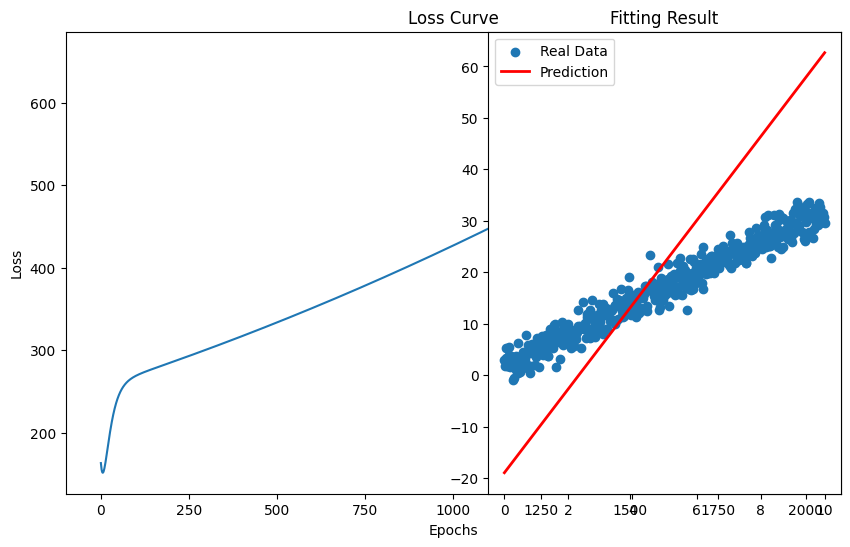

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 10, 460) # # 生成X轴数据
y = 3 * X + 2 + np.random.randn(460) * 2

# 转换为矩阵形状（N, 1）
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# 初始化参数
w = np.random.randn(1) # 随机初始化权重
b = np.random.randn(1) # 随机初始化偏置

# 超参数
lr = 0.001 # 学习率
epochs = 2000 # 迭代次数
losses = [] # 损失函数值

for epoch in range(epochs):
    y_pred = X.dot(w) + b
    
    # 计算损失（均方误差MSE）
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)
    
    # 计算梯度
    dw = np.mean(2 * (y_pred - y) * X) # 梯度计算 
    db = np.mean(2 * (y_pred - y))
    
    # 更新参数
    w -= lr * dw
    b -= lr * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss {loss:.4f}, w {w[0]:.4f}, b {b[0]:.4f}")

print("\n训练结束：")
print(f"学习到的参数：w {w[0]:.4f}, b {b[0]:.4f}")

plt.figure(figsize=(10, 6))

plt.plot(losses)
plt.title("Loss Curve") # Cost Curve // 损失曲线
plt.xlabel("Epochs")
plt.ylabel("Loss")

# 拟合效果
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Real Data")
plt.plot(X, X.dot(w) + b, color="red", linewidth=2, label="Prediction")
plt.title("Fitting Result")
plt.legend()
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd

# 读取数据
data = pd.read_csv('沪深300-460_date.csv')
data = data.dropna() # 处理缺失值
data = data.drop_duplicates() # 处理重复值
data = data.sort_values(by='date') # 按日期排序

# 划分数据集为训练集和测试集
X = data.drop(['date', 'close'], axis=1)
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # 计算均方误差 // 计算 RMSE
rmse = np.sqrt(mse) # 计算 RMSE
print(f"RMSE: {rmse:.4f}")

RMSE: 32.7041


           date    close
0    2005-01-04   982.79
1    2005-01-19   967.21
2    2005-02-03   993.22
3    2005-03-01  1035.93
4    2005-03-16  1003.07
..          ...      ...
455  2025-07-10  4010.02
456  2025-07-25  4127.16
457  2025-08-11  4122.51
458  2025-08-26  4452.59
459  2025-09-08  4462.98

[460 rows x 2 columns]
均方误差 MSE: 62701.71


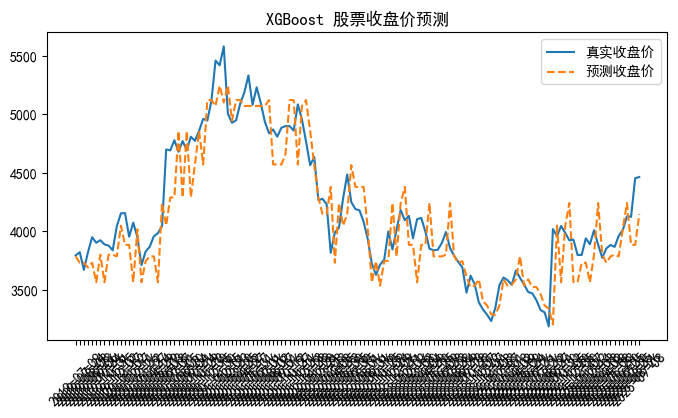

预测下一天收盘价: 4145.60


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']

# ============ 1. 准备数据 ============
# 示例数据（日期, 收盘价）
data = pd.read_csv('沪深300-460_date.csv')
data = data[["date", "close"]]
print(data)

df = pd.DataFrame(data, columns=["date", "close"])

# 特征工程：用前1天的收盘价预测当天收盘价
df["prev_close"] = df["close"].shift(1)
df = df.dropna()

X = df[["prev_close"]]   # 特征
y = df["close"]          # 目标值

# ============ 2. 划分训练/测试集 ============
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# ============ 3. 定义 & 训练模型 ============
model = XGBRegressor(
    n_estimators=200,    # 树的数量
    learning_rate=0.05,  # 学习率
    max_depth=3,         # 每棵树的深度
    random_state=42
)

model.fit(X_train, y_train)

# ============ 4. 预测 ============
y_pred = model.predict(X_test)

# ============ 5. 评估模型 ============
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差 MSE: {mse:.2f}")

# ============ 6. 可视化 ============
plt.figure(figsize=(8,4))
plt.plot(df["date"].iloc[-len(y_test):], y_test, label="真实收盘价")
plt.plot(df["date"].iloc[-len(y_test):], y_pred, label="预测收盘价", linestyle="--")
plt.xticks(rotation=45)
plt.legend()
plt.title("XGBoost 股票收盘价预测")
plt.show()

# ============ 7. 预测未来一天 ============
last_close = df["close"].iloc[-1]   # 最后一天收盘价
tomorrow_pred = model.predict(np.array([[last_close]]))
print(f"预测下一天收盘价: {tomorrow_pred[0]:.2f}")


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']

# ============ 1. 准备数据 ============
# 示例数据（日期, 收盘价）
data = pd.read_csv('沪深300-460_date.csv')
data = data[["date", "close"]]
print(data)

df = pd.DataFrame(data, columns=["date", "close"])

# 1. 基本处理
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# 2. 特征工程：滞后价、滞后收益、均线
df['ret'] = df['close'].pct_change()   # 当日回报
for lag in range(1, 6):                # 前1..5天的价格及回报
    df[f'lag_close_{lag}'] = df['close'].shift(lag)
    df[f'lag_ret_{lag}'] = df['ret'].shift(lag)

df['ma5'] = df['close'].rolling(5).mean()
df['ma10'] = df['close'].rolling(10).mean()
df['std5'] = df['close'].rolling(5).std()

# 3. 目标：下一天的回报 (next_return)
df['target_ret'] = df['close'].shift(-1) / df['close'] - 1

# 4. 丢掉有 NaN 的行
df = df.dropna().reset_index(drop=True)

# 5. 准备 X, y
feature_cols = [f'lag_close_{i}' for i in range(1,6)] + \
               [f'lag_ret_{i}' for i in range(1,6)] + ['ma5','ma10','std5']
X = df[feature_cols]
y = df['target_ret']

# 6. 时间序列切分（最后 20% 做测试）
test_ratio = 0.20
test_size = int(len(df) * test_ratio)
X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

# 7. 基线（naive）：预测明天价格 = 今天价格 -> 明天回报 = 0
#    先把真实价格和预测价格都算出来，便于直接比较 MSE（price）
true_price = X_test['lag_close_1'] * (1 + y_test)       # 真实的 next price
baseline_pred_price = X_test['lag_close_1']             # naive: tomorrow = today

# 8. 训练 XGBoost（预测回报）
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, eval_metric='rmse', verbose=False) # 20轮内没有提升则停止 // early_stopping_rounds 早停机制

# 9. 预测并还原为价格
pred_ret = model.predict(X_test)
pred_price = X_test['lag_close_1'] * (1 + pred_ret)

# 10. 评估（price 层面的 MSE/MAE，与基线对比）
baseline_mse = mean_squared_error(true_price, baseline_pred_price)
baseline_mae = mean_absolute_error(true_price, baseline_pred_price)
mse = mean_squared_error(true_price, pred_price)
mae = mean_absolute_error(true_price, pred_price)

print("样本数（训练/测试）:", len(X_train), "/", len(X_test))
print("Baseline (naive) price MSE, MAE:", baseline_mse, baseline_mae)
print("XGBoost model    price MSE, MAE:", mse, mae)

# 11. 快速看看最后几天的真实 vs 预测
cmp = pd.DataFrame({
    'date': df['date'].iloc[-len(y_test):].values,
    'today_close': X_test['lag_close_1'].values,
    'true_next_close': true_price.values,
    'pred_next_close': pred_price
})
print(cmp.tail(10))

           date    close
0    2005-01-04   982.79
1    2005-01-19   967.21
2    2005-02-03   993.22
3    2005-03-01  1035.93
4    2005-03-16  1003.07
..          ...      ...
455  2025-07-10  4010.02
456  2025-07-25  4127.16
457  2025-08-11  4122.51
458  2025-08-26  4452.59
459  2025-09-08  4462.98

[460 rows x 2 columns]


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'